In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='facebook/opt-350m'

In [3]:
results = {'acc':[],
           'f1':[],
           'r':[]}

In [4]:
ranks = [4,8,16,32]
lora_alpha = 8
lora_dropout = 0.0
lr = 1.0e-5
g = 8
wd = 0.0

for r in ranks:
    print(f'Grid search {model_checkpoint}, lr: {lr}. Focal loss gamma: {g}. Weight decay {wd}. Lora rank: {r}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                                num_labels=data.num_labels,
                                lora=True,
                                r=r,
                                alpha=lora_alpha,
                                dropout=lora_dropout)
    trainer = Engine(epochs=20,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          early_stop=6,
                          gamma=g)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['r'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search facebook/opt-350m, lr: 1e-05. Focal loss gamma: 8. Weight decay 0.0. Lora rank: 4


Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	0.6537	Val Loss:	0.8332	Accuracy:	0.5667	F1:	0.5120
2 / 20: Train Loss:	0.2495	Val Loss:	0.7603	Accuracy:	0.5821	F1:	0.4947
3 / 20: Train Loss:	0.1569	Val Loss:	0.7535	Accuracy:	0.5558	F1:	0.4764
4 / 20: Train Loss:	0.1441	Val Loss:	0.7454	Accuracy:	0.5602	F1:	0.4683
5 / 20: Train Loss:	0.1159	Val Loss:	0.7577	Accuracy:	0.5186	F1:	0.4596
6 / 20: Train Loss:	0.0918	Val Loss:	0.7452	Accuracy:	0.5492	F1:	0.4718
7 / 20: Train Loss:	0.0861	Val Loss:	0.7442	Accuracy:	0.5536	F1:	0.4867
No improvement for 6 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.25      0.37      0.30       119
      struct       0.74      0.62      0.67       338

    accuracy                           0.55       457
   macro avg       0.50      0.49      0.49       457
weighted avg       0.61      0.55      0.58       457

test results:
              precision    recall  f1-score   support

       bknow

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	0.6369	Val Loss:	0.8316	Accuracy:	0.5602	F1:	0.5022
2 / 20: Train Loss:	0.2465	Val Loss:	0.7598	Accuracy:	0.5842	F1:	0.4963
3 / 20: Train Loss:	0.1542	Val Loss:	0.7526	Accuracy:	0.5580	F1:	0.4736
4 / 20: Train Loss:	0.1413	Val Loss:	0.7449	Accuracy:	0.5667	F1:	0.4773
5 / 20: Train Loss:	0.1136	Val Loss:	0.7569	Accuracy:	0.5274	F1:	0.4677
6 / 20: Train Loss:	0.0906	Val Loss:	0.7454	Accuracy:	0.5646	F1:	0.4907
7 / 20: Train Loss:	0.0870	Val Loss:	0.7443	Accuracy:	0.5646	F1:	0.4927
No improvement for 6 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.26      0.36      0.30       119
      struct       0.74      0.64      0.68       338

    accuracy                           0.56       457
   macro avg       0.50      0.50      0.49       457
weighted avg       0.61      0.56      0.58       457

test results:
              precision    recall  f1-score   support

       bknow

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	0.6225	Val Loss:	0.8290	Accuracy:	0.5646	F1:	0.5104
2 / 20: Train Loss:	0.2396	Val Loss:	0.7608	Accuracy:	0.5755	F1:	0.4923
3 / 20: Train Loss:	0.1518	Val Loss:	0.7551	Accuracy:	0.5383	F1:	0.4579
4 / 20: Train Loss:	0.1398	Val Loss:	0.7477	Accuracy:	0.5602	F1:	0.4773
5 / 20: Train Loss:	0.1130	Val Loss:	0.7602	Accuracy:	0.5142	F1:	0.4582
6 / 20: Train Loss:	0.0899	Val Loss:	0.7467	Accuracy:	0.5558	F1:	0.4784
7 / 20: Train Loss:	0.0859	Val Loss:	0.7459	Accuracy:	0.5624	F1:	0.4986
No improvement for 6 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.27      0.39      0.32       119
      struct       0.74      0.62      0.68       338

    accuracy                           0.56       457
   macro avg       0.51      0.51      0.50       457
weighted avg       0.62      0.56      0.58       457

test results:
              precision    recall  f1-score   support

       bknow

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	0.6354	Val Loss:	0.8284	Accuracy:	0.5602	F1:	0.5022
2 / 20: Train Loss:	0.2415	Val Loss:	0.7592	Accuracy:	0.5821	F1:	0.4969
3 / 20: Train Loss:	0.1519	Val Loss:	0.7537	Accuracy:	0.5470	F1:	0.4660
4 / 20: Train Loss:	0.1404	Val Loss:	0.7457	Accuracy:	0.5711	F1:	0.4803
5 / 20: Train Loss:	0.1130	Val Loss:	0.7581	Accuracy:	0.5208	F1:	0.4612
6 / 20: Train Loss:	0.0898	Val Loss:	0.7459	Accuracy:	0.5558	F1:	0.4825
7 / 20: Train Loss:	0.0860	Val Loss:	0.7450	Accuracy:	0.5580	F1:	0.4917
No improvement for 6 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.26      0.38      0.31       119
      struct       0.74      0.62      0.68       338

    accuracy                           0.56       457
   macro avg       0.50      0.50      0.49       457
weighted avg       0.61      0.56      0.58       457

test results:
              precision    recall  f1-score   support

       bknow

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

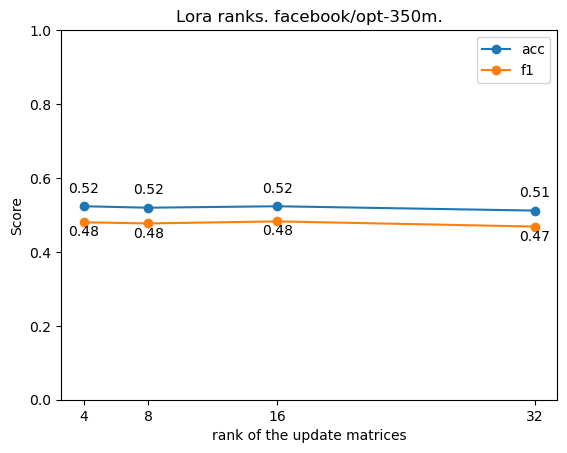

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='r', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["r"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["r"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['r'], [val for val in df['r']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('rank of the update matrices')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Lora ranks. {model_checkpoint}.')